In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.interpolate import make_interp_spline
from sklearn.linear_model import LogisticRegression
import difflib
from sklearn.dummy import DummyClassifier
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

from nltk.corpus import movie_reviews
from nltk.stem.snowball import PorterStemmer
import string
import re

import tensorflow 
from tensorflow import keras
#import spacy
#from spacy.lang.en.stop_words import STOP_WORDS
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Load the nltk dataset
nltk.download('movie_reviews', quiet=True)

True

In [4]:
x = [' '.join(movie_reviews.words(file_id)) for file_id in movie_reviews.fileids()]
y = [movie_reviews.categories(file_id)[0] for file_id in movie_reviews.fileids()]

y = [0 if label == 'neg' else 1 for label in y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [5]:
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

stemmer = PorterStemmer()

def stopword_and_stem_tokenizer(corpus):
    """
    Custom tokenizer function to be passed in TfidfVectorizer.
    Ignores english stopwords and applies stemming to remaining tokens.
    """
    tokens = [word for sentence in nltk.word_tokenize(corpus) for word in nltk.word_tokenize(sentence)]
    valid_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token): # ignore non-alphabetic characters
            valid_tokens.append(token)
    result = [stemmer.stem(t) for t in valid_tokens if t not in stopwords.words('english')]
    return result

In [28]:
#punkt

In [46]:
corpora = []
y_new = []
for i,sentence in enumerate(x_train):
  #  st = stopword_and_stem_tokenizer(sentence)
   # stl = str(st)
    curr = word_tokenize(sentence)
    curr = [word for word in curr]
    ioi = [y_train[i] for word in curr]
    y_new.append(ioi)
    corpora.append(curr)
    
        
    
test_x = []
for sentence in x_test:
   # st = stopword_and_stem_tokenizer(sentence)
  #  stl = str(st)
    curr = word_tokenize(sentence)
    curr = [word for word in curr]
    test_x.append(curr)

In [49]:
test_x[0]

['the',
 'verdict',
 ':',
 'spine',
 '-',
 'chilling',
 'drama',
 'from',
 'horror',
 'maestro',
 'stephen',
 'king',
 ',',
 'featuring',
 'an',
 'outstanding',
 ',',
 'oscar',
 '-',
 'winning',
 'performance',
 'from',
 'kathy',
 'bates',
 '.',
 'geez',
 ',',
 'french',
 'and',
 'saunders',
 'had',
 'a',
 'field',
 'day',
 'when',
 'they',
 'set',
 'to',
 'work',
 'on',
 'parodying',
 'this',
 '!',
 'sorry',
 ',',
 'non',
 '-',
 'british',
 'readers',
 'may',
 'not',
 'be',
 'familiar',
 'with',
 'french',
 'and',
 'saunders',
 '-',
 'my',
 'apologies',
 '.',
 'the',
 'pair',
 'are',
 'british',
 'comediennes',
 '(',
 'jennifer',
 'saunders',
 'later',
 'went',
 'on',
 'to',
 'become',
 'edina',
 'monsoon',
 'in',
 '``',
 'absolutely',
 'fabulous',
 '``',
 ')',
 ',',
 'who',
 'did',
 'a',
 'series',
 'of',
 'film',
 'spoofs',
 'a',
 'few',
 'years',
 'back',
 ',',
 'including',
 'alien',
 ',',
 'the',
 'exorcist',
 'and',
 'misery',
 '.',
 'needless',
 'to',
 'say',
 ',',
 'amidst',
 

### Methods to assess the performance of each classifier

As stated, the idea of implementing a polynomial classifier was set; however, to assess the polynomial classifier objectively a direct comparison between the polynomial classifier and other machine learning methods is necessary. For this reason, a classification report as well as the confusion matrix for each classifier is a coded method.

In [50]:
def sk_metrics(y_test,prediction_test,x_test,clf):
    print('Testing set')
    print('===========')
    print(classification_report(y_test, prediction_test, zero_division=0))
    # confusion matrix
    ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, values_format='.0f')
    plt.show()

In [51]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
preds = dummy_clf.predict(x_test)

Testing set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       302
           1       0.50      1.00      0.66       298

    accuracy                           0.50       600
   macro avg       0.25      0.50      0.33       600
weighted avg       0.25      0.50      0.33       600



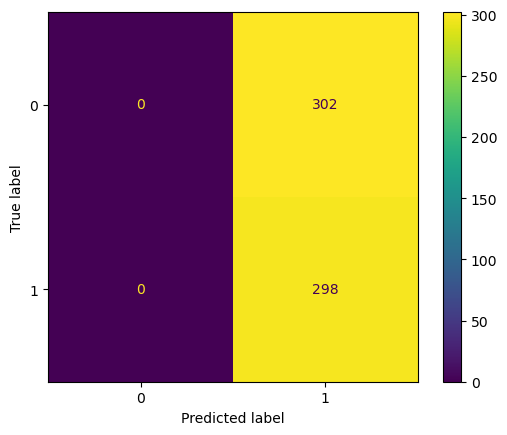

In [52]:
sk_metrics(y_test,preds,x_test,dummy_clf)

In [114]:
class D1LP(object):
    def __init__(self, valid_data, eval_data):
        super(object, self).__init__()
        self.validation_data = valid_data
        self.evaluation_data = eval_data
        
        
    def separate(self,imp,lotion):
        T = []
        Y0=self.evaluation_data
        X0 = self.validation_data # images

        for x in range(len(set(Y0))):
            T.append([])
            
        for x,i in enumerate(Y0):
            T[i].append(lotion[x])
            
        return T

    
    def EuC(self,error,test): 
       # print(A)
       # print(B)
       # break
        euge = np.intersect1d(error, test)
       # print(euge)
      #  print()
       # euge = np.max([difflib.SequenceMatcher(None,t,test).ratio() for t in error])
        return euge
    
    
   
            
    def classify(self,test_data):
        arr = set(self.evaluation_data)
        X0 = self.validation_data
        Y0 = self.evaluation_data
        

        train_x = []
        for i,j in enumerate(X0):
            train_x.append(j)
        hoc = self.separate(X0,train_x)
        


        extra = [x for row in hoc[0] for x in row]
        extrum = [x for row in hoc[1] for x in row]

        hac = [extra,extrum]
        test = []
        for i,j in enumerate(test_data):
            test.append(j)
        
        land = []
        for al8da in tqdm(range(len(test)),ascii=' >=',bar_format='{desc:<5.5}{percentage:3.0f}%|{bar:50}{r_bar}'):
            mos = []
            for ad in range(len(arr)):
                ris = self.EuC(hac[ad],test[al8da])

                mos.append(len(ris))
            land.append(np.argmax(mos))

        return land
        

In [115]:
ML = D1LP(corpora[:100],y_train[:100])
preds = ML.classify(test_x[:100])

     100%|==================================================| 100/100 [00:01<00:00, 66.20it/s]


Testing set
VV_______VV
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        47
           1       0.54      1.00      0.70        53

    accuracy                           0.55       100
   macro avg       0.77      0.52      0.39       100
weighted avg       0.76      0.55      0.41       100



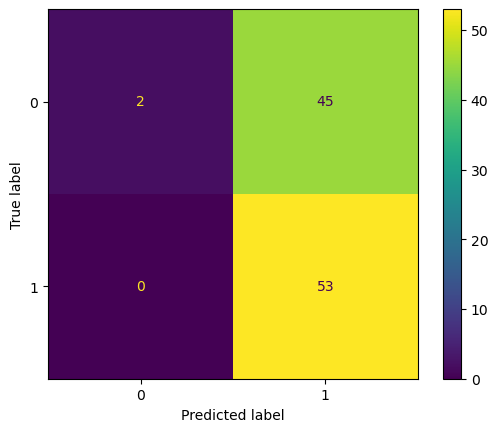

In [116]:
#predictions_test = np.argmax(model.predict(test_images, verbose=0), -1)
print('Testing set')
print('VV_______VV')
print(classification_report(y_test[:100], preds))


# test: confusion matrix
cf_matrix = confusion_matrix(y_test[:100], preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()

In [117]:
ML = D1LP(corpora[:250],y_train[:250])
preds = ML.classify(test_x[:100])

     100%|==================================================| 100/100 [00:04<00:00, 22.49it/s]


Testing set
VV_______VV
              precision    recall  f1-score   support

           0       0.59      0.64      0.61        47
           1       0.65      0.60      0.63        53

    accuracy                           0.62       100
   macro avg       0.62      0.62      0.62       100
weighted avg       0.62      0.62      0.62       100



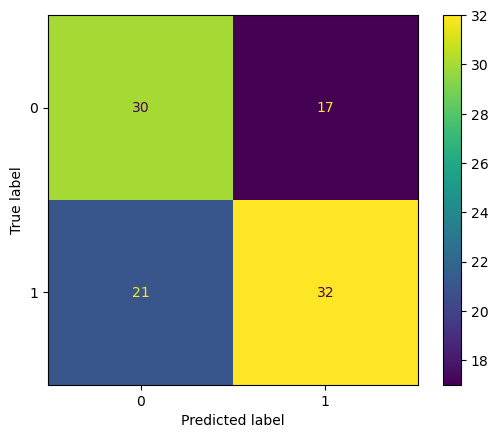

In [118]:
#predictions_test = np.argmax(model.predict(test_images, verbose=0), -1)
print('Testing set')
print('VV_______VV')
print(classification_report(y_test[:100], preds))


# test: confusion matrix
cf_matrix = confusion_matrix(y_test[:100], preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()

In [119]:
ML = D1LP(corpora[:500],y_train[:500])
preds = ML.classify(test_x[:100])

     100%|==================================================| 100/100 [00:12<00:00,  8.22it/s]


Testing set
VV_______VV
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        47
           1       0.64      0.64      0.64        53

    accuracy                           0.62       100
   macro avg       0.62      0.62      0.62       100
weighted avg       0.62      0.62      0.62       100



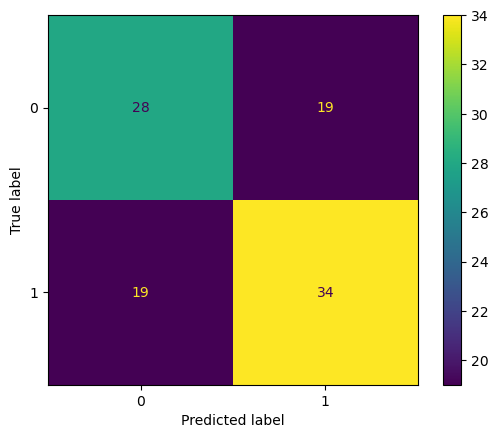

In [120]:
#predictions_test = np.argmax(model.predict(test_images, verbose=0), -1)
print('Testing set')
print('VV_______VV')
print(classification_report(y_test[:100], preds))


# test: confusion matrix
cf_matrix = confusion_matrix(y_test[:100], preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()

In [123]:
ML = D1LP(corpora,y_train)
preds = ML.classify(test_x[:100])

     100%|==================================================| 100/100 [00:44<00:00,  2.27it/s]


Testing set
VV_______VV
              precision    recall  f1-score   support

           0       0.63      0.55      0.59        47
           1       0.64      0.72      0.68        53

    accuracy                           0.64       100
   macro avg       0.64      0.64      0.63       100
weighted avg       0.64      0.64      0.64       100



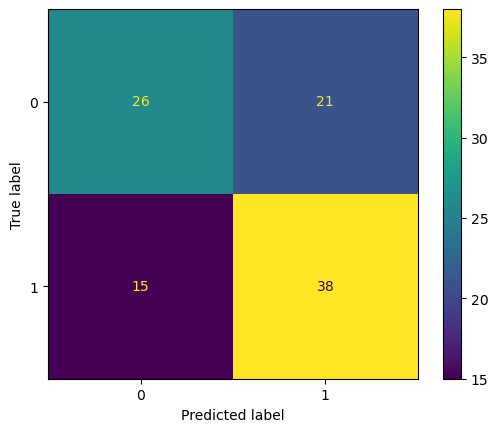

In [124]:
#predictions_test = np.argmax(model.predict(test_images, verbose=0), -1)
print('Testing set')
print('VV_______VV')
print(classification_report(y_test[:100], preds))


# test: confusion matrix
cf_matrix = confusion_matrix(y_test[:100], preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()